In [11]:
from scipy.special import digamma, gamma
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X = (0.44, 0.89, 0.76, 3.99, 3.39, 1.31, 0.98, 3.51, 0.35, 2.06)



In [23]:
def log_likelihood(X, theta):
    n = len(X)
    return -n * np.log(gamma(theta)) + (theta-1) * sum(np.log(X)) - np.sum(X)


In [24]:
def gamme_deriv(X, theta):
    n = len(X)
    return -n * digamma(theta) + sum(np.log(X))

In [25]:
def bisection_solve(f, a, b, tol=1e-10):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have different signs")
    
    while (b - a) / 2.0 > tol:
        midpoint = (a + b) / 2.0
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2.0

In [26]:
bisection_solve(lambda theta: gamme_deriv(X, theta), 0.1, 10)

1.7626576263945022

In [15]:
points = np.linspace(0, 10, 101)
l_points = [log_likelihood(X, theta) for theta in points]

l_deriv = [gamme_deriv(X, theta) for theta in points]



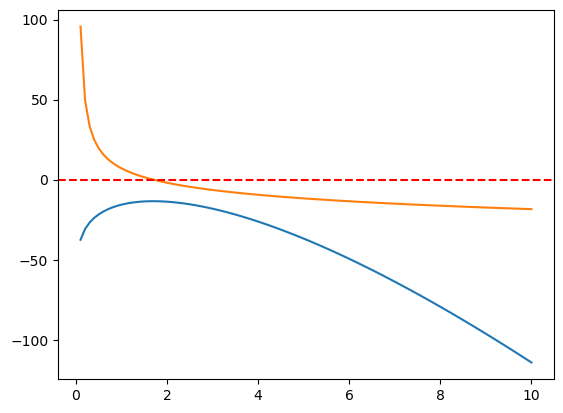

In [16]:
plt.plot(points, l_points, label='Log Likelihood')
plt.plot(points, l_deriv, label='Derivative of Log Likelihood')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.show()